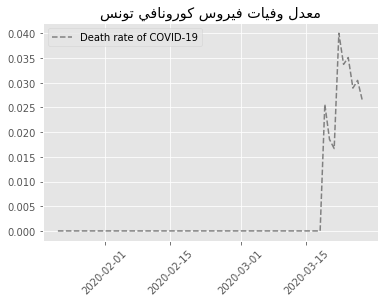

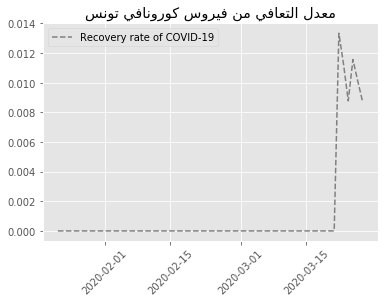

In [6]:
"""
covid-19 هذاتحليل لحالة
in GERMANY
استناداً إلى البيانات المتاحة من جامعة جونز هوبكنز

MIT licensed by Ayoub Malek
"""
import warnings
import datetime
import matplotlib
import pandas as pd
import arabic_reshaper
from sirfit import SirFit
import matplotlib.pyplot as plt
from covid_world import CovidWorld
from bidi import algorithm as bidialg
from covid_country import CovidCountry


# hide warnings
warnings.filterwarnings("ignore") 

# set style
matplotlib.rcParams.update({'font.size': 9})
plt.style.use('ggplot')

# Country
tn = CovidCountry(country="Tunisia")
tn.parse_data()

# death and recovery rates
tn.compute_death_rate(smooth=False, plot=True, title=bidialg.get_display(arabic_reshaper.reshape(u"معدل وفيات فيروس كورونافي تونس")))
tn.compute_recovery_rate(smooth=False, plot=True, title=bidialg.get_display(arabic_reshaper.reshape(u"معدل التعافي من فيروس كورونافي تونس")))

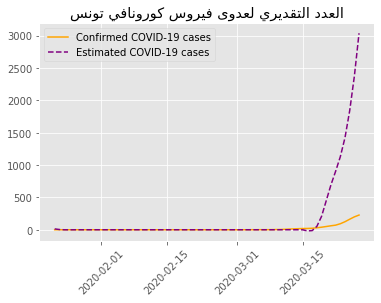

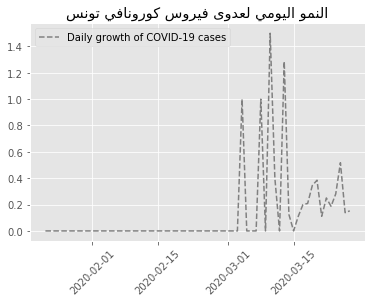

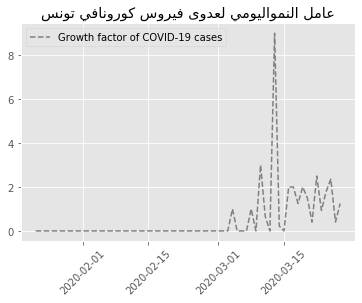

In [7]:
# infections estimations and growth
tn.compute_estimations(smooth=True, plot=True, title=bidialg.get_display(arabic_reshaper.reshape(u"العدد التقديري لعدوى فيروس كورونافي تونس")))
tn.compute_daily_growth(smooth=False, plot=True, title=bidialg.get_display(arabic_reshaper.reshape(u"النمو اليومي لعدوى فيروس كورونافي تونس")))
tn.compute_growth_factor(smooth=False, plot=True, title=bidialg.get_display(arabic_reshaper.reshape(u"عامل النمواليومي لعدوى فيروس كورونافي تونس")))

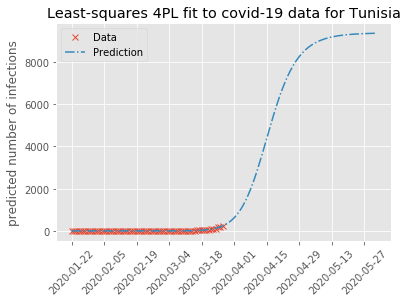

In [11]:
# modelling and fits
# logistic curve model
tn.logisitc_fit(p0=[0, 1, 1, 1], plot=True, title='Least-squares 4PL fit to covid-19 data for Tunisia')
plt.show()

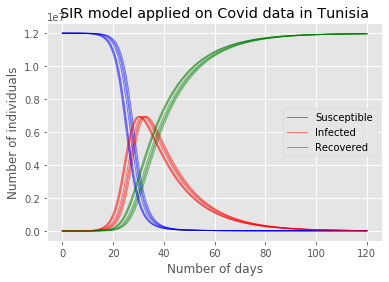

In [13]:
# SIR model
ij = list(zip(tn.covid_df.confirmed_cases.values, tn.covid_df.recovered_cases.values))
for i, j in ij[-7:]:
    sf = SirFit(total_population=12000000, I0=i, R0=j, 
                contract_rate=.5, recovery_rate=1/14,
                number_of_days=120)
    t, S, I, R = sf.fit()
    sf.plot_fit(t, S, I, R, title="SIR model applied on Covid data in Tunisia")
plt.show()